<a href="https://colab.research.google.com/github/KrishnanandSingh/EVA/blob/master/Project-6/Assignment_6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA: Assignment 6B

Purpose of this exercise is to get familiar with the Keras functional API and different convolutions e.g. Separable Convolution, Depthwise Convolution and Grouped Convolution. I have used 6A as base to understand and converted it to functional API step by step.

### Import Libraries and modules

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.models import Model
from keras.layers import Input, Conv2D, AveragePooling2D, merge, concatenate, SeparableConv2D, DepthwiseConv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

### Get the dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

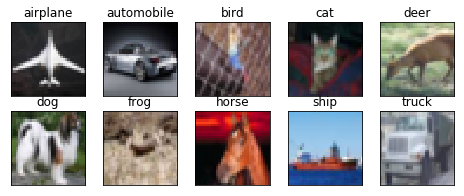

In [11]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Define method to plot model history curve after it is trained

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Define method to get validation accuracy

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Convert the pixel values to 0,1 and outputs to categorical so that it is easier to train.

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Create the model

This is the model that we need to improve.

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Notice the number of parameters in dense layers. The two layers contribute to about 40 % of the total parameters.

### Train for 100 epochs

Create a image data generator and start training the model. After training is over plot the history curve and note down the accuracy.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 21s 54ms/step - loss: 1.8661 - acc: 0.2805 - val_loss: 1.4259 - val_acc: 0.4647
Epoch 2/100
390/390 [==============================] - 20s 51ms/step - loss: 1.3834 - acc: 0.4992 - val_loss: 1.1972 - val_acc: 0.5726
Epoch 3/100
390/390 [==============================] - 20s 52ms/step - loss: 1.1741 - acc: 0.5787 - val_loss: 1.0371 - val_acc: 0.6314
Epoch 4/100
390/390 [==============================] - 20s 52ms/step - loss: 1.0356 - acc: 0.6336 - val_loss: 0.8875 - val_acc: 0.6883
Epoch 5/100
390/390 [==============================] - 20s 52ms/step - loss: 0.9364 - acc: 0.6719 - val_loss: 0.8176 - val_acc: 0.7193
Epoch 6/100
390/390 [==============================] - 20s 51ms/step - loss: 0.8539 - acc: 0.7010 - val_loss: 0.7483 - val_acc: 0.7417
Epoch 7/100
390/390 [==============================] - 20s 51ms/step - loss: 0.7931 - acc: 0.7245 - val_loss: 0.7403 - val_acc: 0.7513
Epoch 8/100
390/390 [==============================] - 

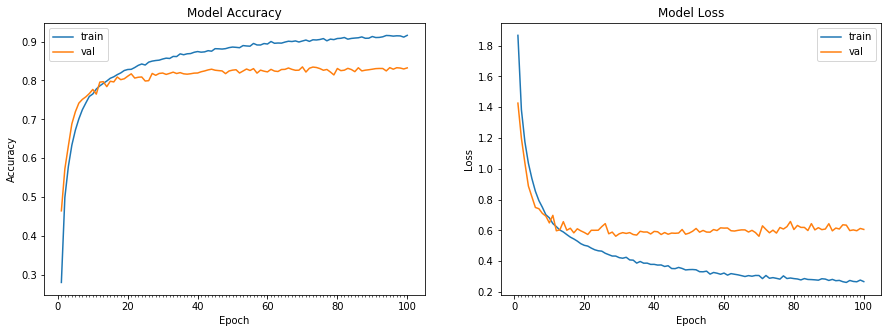

Accuracy on test data is: 83.24


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### 6A Improved model

This model is the sequential model used in 6A.

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))#30, 30
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))#28, 28
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3))#26, 26
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))#13,13

model.add(Convolution2D(32, 1, 1))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))#11, 11
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3, border_mode='same'))#9, 11
# 9, 11 (while network says 11 as the RF it is actually 9)
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Convolution2D(256, 3, 3, border_mode='same'))#7, 11
model.add(Activation('relu'))

model.add(Convolution2D(32, 1, 1))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(10, 11, 11))#-3, 1

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 6A translated in Functional API

In [0]:
# Define the model

input = Input(shape=(32, 32, 3,))
layer_1 = Conv2D(32, (3,3))(input)#30, 30

relu_1 = Activation('relu')(layer_1)
layer_2 = Conv2D(64, (3,3))(relu_1)#28, 28

relu_2 = Activation('relu')(layer_2)
layer_3 = Conv2D(128, (3,3))(relu_2)#26, 26

relu_3 = Activation('relu')(layer_3)
# to experiment, using AveragePooling instead of MaxPool
avg_pooling_1 = AveragePooling2D(pool_size=(2,2))(relu_3) #13, 13
relu_4 = Activation('relu')(avg_pooling_1)
layer_5 = Conv2D(32, (1,1))(relu_4)

relu_5 = Activation('relu')(layer_5)
layer_6 = Conv2D(64, (3,3))(relu_5)#11, 11

relu_6 = Activation('relu')(layer_6)
layer_7 = Conv2D(128, (3,3), padding='same')(relu_6)#9, 11

relu_7 = Activation('relu')(layer_7)
layer_8 = Conv2D(256, (3,3), padding='same')(relu_7)#7, 11


relu_8 = Activation('relu')(layer_8)
layer_9 = Conv2D(32, (1,1))(relu_8)


relu_9 = Activation('relu')(layer_9)
layer_10 = Conv2D(10, (11,11))(relu_9)#-3, 1

flat = Flatten()(layer_10)
output = Activation('softmax')(flat)

model = Model(inputs=[input], outputs=[output])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_29 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
activation_30 (Activation)   (None, 26, 26, 128)       0         
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=10)`
  if sys.path[0] == '':


Epoch 1/10
390/390 [==============================] - 18s 45ms/step - loss: 1.6265 - acc: 0.4050 - val_loss: 1.3644 - val_acc: 0.5027
Epoch 2/10
390/390 [==============================] - 12s 31ms/step - loss: 1.2102 - acc: 0.5691 - val_loss: 1.0903 - val_acc: 0.6143
Epoch 3/10
390/390 [==============================] - 12s 31ms/step - loss: 1.0021 - acc: 0.6461 - val_loss: 0.9217 - val_acc: 0.6771
Epoch 4/10
390/390 [==============================] - 12s 31ms/step - loss: 0.8505 - acc: 0.7019 - val_loss: 0.8242 - val_acc: 0.7170
Epoch 5/10
390/390 [==============================] - 12s 31ms/step - loss: 0.7379 - acc: 0.7430 - val_loss: 0.7787 - val_acc: 0.7315
Epoch 6/10
390/390 [==============================] - 12s 31ms/step - loss: 0.6518 - acc: 0.7733 - val_loss: 0.7471 - val_acc: 0.7396
Epoch 7/10
390/390 [==============================] - 12s 32ms/step - loss: 0.5804 - acc: 0.7990 - val_loss: 0.7308 - val_acc: 0.7537
Epoch 8/10
390/390 [==============================] - 12s 32ms

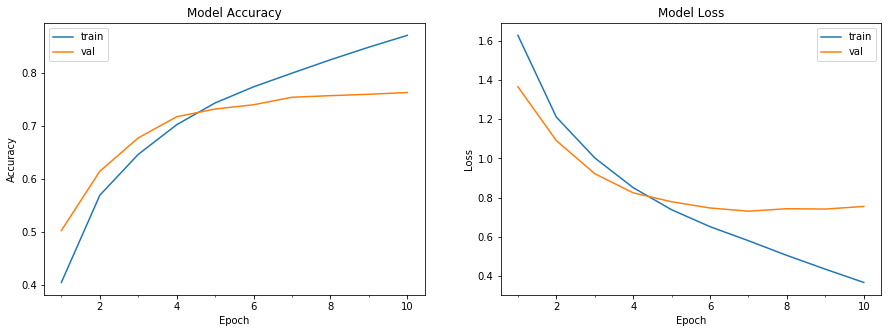

Accuracy on test data is: 76.26


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

We see that just changing the API did not affect on the number of parameters or the model performance. Now we have got some confidence in functional API we'll try to add different convolutions as required.

### FinaI model using different convolutions

In [17]:
dropout_rate = 0.2
# Define the model

input = Input(shape=(32, 32, 3,))
layer_1 = Conv2D(32, (3,3), name='layer1')(input)#30, 30

relu_1 = Activation('relu', name='relu_1')(layer_1)
layer_2 = Conv2D(64, (3,3), name='layer_2')(relu_1)#28, 28
layer_2 = Dropout(dropout_rate)(layer_2)

relu_2 = Activation('relu', name='relu_2')(layer_2)
# Spatially separable convolution
layer_3_1 = Conv2D(128, (1,3), name='layer_3_1')(relu_2)
layer_3 = Conv2D(128, (3,1), name='layer_3')(layer_3_1)#26, 26
layer_3 = Dropout(dropout_rate)(layer_3)

relu_3 = Activation('relu', name='relu_3')(layer_3)
avg_pooling_1 = AveragePooling2D(pool_size=(2,2))(relu_3) #13, 13
relu_4 = Activation('relu', name='relu_4')(avg_pooling_1)
layer_5 = Conv2D(32, (1,1), name='layer_5')(relu_4)
layer_5 = Dropout(dropout_rate)(layer_5)

relu_5 = Activation('relu', name='relu_5')(layer_5)
# Depthwise separable convolution
layer_6 = SeparableConv2D(64, (3,3), name='layer_6')(relu_5)#11, 11
layer_6 = Dropout(dropout_rate)(layer_6)

relu_6 = Activation('relu', name='relu_6')(layer_6)
layer_7_group3 = Conv2D(128, (3,3), padding='same', name='layer_7_group3')(relu_6)#9, 11
relu_7_3 = Activation('relu', name='relu_7_3')(layer_7_group3)
layer_7_group5 = Conv2D(128, (5,5), padding='same', name='layer_7_group5')(relu_6)#7, 11
relu_7_5 = Activation('relu', name='relu_7_5')(layer_7_group5)
layer_7 = concatenate([relu_7_3,relu_7_5], name='layer_7_concat')
layer_7 = Dropout(dropout_rate)(layer_7)

relu_7 = Activation('relu', name='relu_7')(layer_7)
layer_8_group1 = Conv2D(256, (3,3), dilation_rate=1, padding='same', name='layer_8_group1')(relu_6)#(7, 11), (5, 11)
relu_8_1 = Activation('relu', name='relu_8_1')(layer_8_group1)
layer_8_group2 = Conv2D(128, (5,5), dilation_rate=2, padding='same', name='layer_8_group2')(relu_6)#(5, 11), (3, 11)
relu_8_2 = Activation('relu', name='relu_8_2')(layer_8_group2)
layer_8 = concatenate([relu_8_1,relu_8_2], name='layer_8_concat')
layer_8 = Dropout(dropout_rate)(layer_8)

relu_8 = Activation('relu', name='relu_8')(layer_8)
layer_9 = Conv2D(32, (1,1))(relu_8)
layer_9 = Dropout(dropout_rate)(layer_9)


relu_9 = Activation('relu', name='relu_9')(layer_9)
layer_10 = Conv2D(10, (11,11))(relu_9)

flat = Flatten()(layer_10)
output = Activation('softmax', name='output')(flat)

model = Model(inputs=[input], outputs=[output])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
layer1 (Conv2D)                 (None, 30, 30, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
relu_1 (Activation)             (None, 30, 30, 32)   0           layer1[0][0]                     
__________________________________________________________________________________________________
layer_2 (Conv2D)                (None, 28, 28, 64)   18496       relu_1[0][0]                     
__________________________________________________________________________________________________
dropout_1 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 25s 65ms/step - loss: 1.7301 - acc: 0.3630 - val_loss: 1.3943 - val_acc: 0.4916
Epoch 2/50
390/390 [==============================] - 23s 59ms/step - loss: 1.3168 - acc: 0.5256 - val_loss: 1.1492 - val_acc: 0.5915
Epoch 3/50
390/390 [==============================] - 23s 58ms/step - loss: 1.1394 - acc: 0.5946 - val_loss: 1.0685 - val_acc: 0.6226
Epoch 4/50
390/390 [==============================] - 23s 58ms/step - loss: 1.0098 - acc: 0.6452 - val_loss: 0.9504 - val_acc: 0.6646
Epoch 5/50
390/390 [==============================] - 23s 59ms/step - loss: 0.9286 - acc: 0.6726 - val_loss: 0.9097 - val_acc: 0.6763
Epoch 6/50
390/390 [==============================] - 23s 58ms/step - loss: 0.8584 - acc: 0.6976 - val_loss: 0.8672 - val_acc: 0.6942
Epoch 7/50
390/390 [==============================] - 23s 59ms/step - loss: 0.8105 - acc: 0.7131 - val_loss: 0.8088 - val_acc: 0.7142
Epoch 8/50
390/390 [==============================] - 23s 58ms

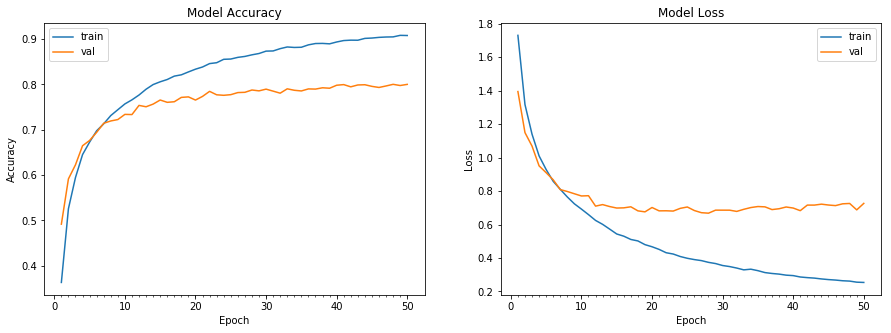

Accuracy on test data is: 80.00


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))